<a href="https://colab.research.google.com/github/nsk20/CMPE257-Fall23-ShyamKumar-Nalluri/blob/homework-1/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Generates N random points for a given linear separator w
## if wTx > 0, y = 1; if wTx < 0, y = -1. wTx = 0 are discarded



def generate_pla(N=20, w0=0, w1=1, w2=1):
    n = 0
    data = []
    while n < N:
        x1 = random.uniform(-10, 10)
        x2 = random.uniform(-10, 10)
        y_step = w0 + w1 * x1 + w2 * x2
        if y_step == 0:
            continue
        if y_step > 0:
            label = 1
        else:
            label = -1
        data.append([1, x1, x2, label])
        n += 1
    return np.array(data)

In [132]:
f_w0, f_w1, f_w2 = 1, 1, 1
norm_coeffs = [f_w0, f_w1, f_w2]
n = 100
m=10000
data = generate_pla(n, f_w0, f_w1, f_w2)
data1 = generate_pla(m, f_w0, f_w1, f_w2)

In [133]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label = "x_2="+str(slope)+"x_1+"+str(intercept) )

In [134]:
import pandas as pd

df = pd.DataFrame(data)
df.drop([0], axis = 1, inplace=True)
df.columns = ['x1', 'x2', 'y']
df['y'] = df['y'].astype('int64')
df['x0'] = 1
df = df[['x0', 'x1', 'x2', 'y']]


In [135]:
test_df = pd.DataFrame(data)
test_df.drop([0], axis = 1, inplace=True)
test_df.columns = ['x1', 'x2', 'y']
test_df['y'] = test_df['y'].astype('int64')
test_df['x0'] = 1
test_df = test_df[['x0', 'x1', 'x2', 'y']]

In [136]:
df.info()
print(df)

test_df.info()
print(test_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      100 non-null    int64  
 1   x1      100 non-null    float64
 2   x2      100 non-null    float64
 3   y       100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB
    x0        x1        x2  y
0    1  4.652951 -9.645323 -1
1    1  3.679763  1.415713  1
2    1 -5.265166 -6.275316 -1
3    1  1.838947  8.400510  1
4    1  7.388547 -2.157043  1
..  ..       ...       ... ..
95   1  4.423536  4.139333  1
96   1  7.275136 -1.833871  1
97   1  1.189250  7.546499  1
98   1  0.569892  4.374829  1
99   1 -0.478825  8.875785  1

[100 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      100 non-null    int64  
 1   x1      100 non-null  

In [137]:
def perceptron(points, dim, max_it=100, mod_perceptron=True,
               eta = 1, randomize=False, print_out = True):
    w = np.zeros(dim+1)
    xs, ys = points[:,:dim+1], points[:,dim+1]
    num_points = points.shape[0]
    for it in range(max_it):
        correctly_predicted_ids=  set()
        idxs = np.arange(num_points)
        if randomize:
            idxs = np.random.choice(np.arange(num_points), num_points, replace=False)
        for idx in idxs:
            x, y = xs[idx], ys[idx]
            st = np.dot(w.T, x)
            prod = st*y #np.dot(w.T, x)*y
            if prod < -100: #avoid out of bound error
                st = -100
            threshold = 1 if mod_perceptron else 0
            st = st if mod_perceptron else 0
            if prod <= threshold:
                w = w + eta *(y-st)*x
                break #PLA picks one example at each iteration
            else:
                correctly_predicted_ids.add(idx)
        if len(correctly_predicted_ids) == num_points:
            break


    w = w/w[-1]
    return w, it


def plot_data(df, norm_coeffs, norm_g, lb, ub):
    x1 = np.linspace(lb, ub, 100)  # Generate x1 values for the plot
    figsize = plt.figaspect(1)
    f, ax = plt.subplots(1, 1, figsize=figsize)
    cls1_df = df.loc[df['y'] == 1]
    cls2_df = df.loc[df['y'] == -1]

    true_function = ax.plot(x1, -(norm_coeffs[0] + norm_coeffs[1] * x1), label='True Function')

    if norm_g is not None:
        final_hypothesis = ax.plot(x1, -(norm_g[0] + norm_g[1] * x1), c='r', label='Final Hypothesis')

    pluses = ax.scatter(cls1_df['x1'], cls1_df['x2'], marker='+', c='r', label='+1 labels')
    minuses = ax.scatter(cls2_df['x1'], cls2_df['x2'], marker=r'$-$', c='b', label='-1 labels')

    ax.set_ylabel(r"$x_2$", fontsize=11)
    ax.set_xlabel(r"$x_1$", fontsize=11)
    ax.set_title('Data set size = %s' % df.shape[0], fontsize=9)
    ax.axis('tight')

    legend_x = 2.0
    legend_y = 0.5
    ax.legend(['True Function', 'Final Hypothesis', '+1 labels', '-1 labels'],
              loc='center right', bbox_to_anchor=(legend_x, legend_y))

    ax.set_xlim(left=lb, right=ub)
    ax.set_ylim(bottom=lb, top=ub)

    plt.show()

# Usage example:
# Call this function with your DataFrame 'df', normalized coefficients 'norm_coeffs',
# final hypothesis coefficients 'norm_g', lower bound 'lb', and upper bound 'ub'.
# plot_data(df, norm_coeffs, norm_g, lb, ub)


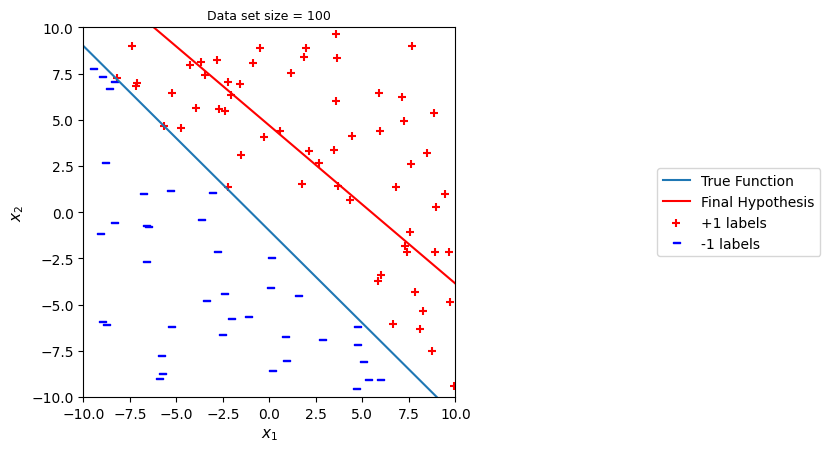

Eta =  100  Accuracy =  0.7
----------------------------------------------


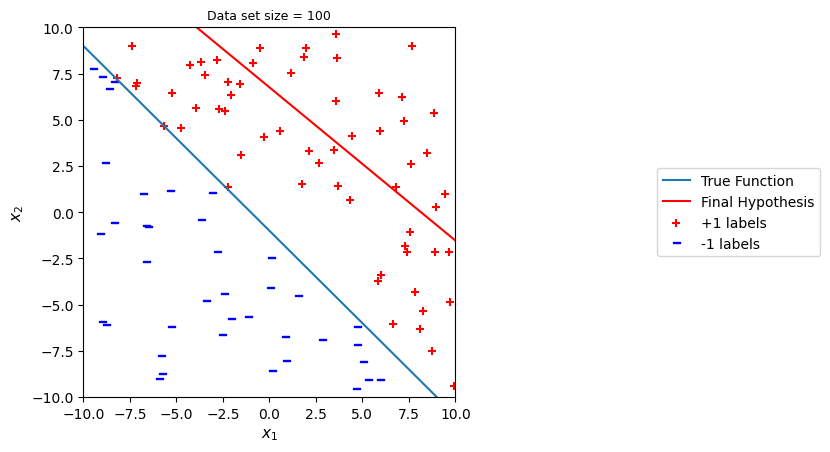

Eta =  1  Accuracy =  0.59
----------------------------------------------


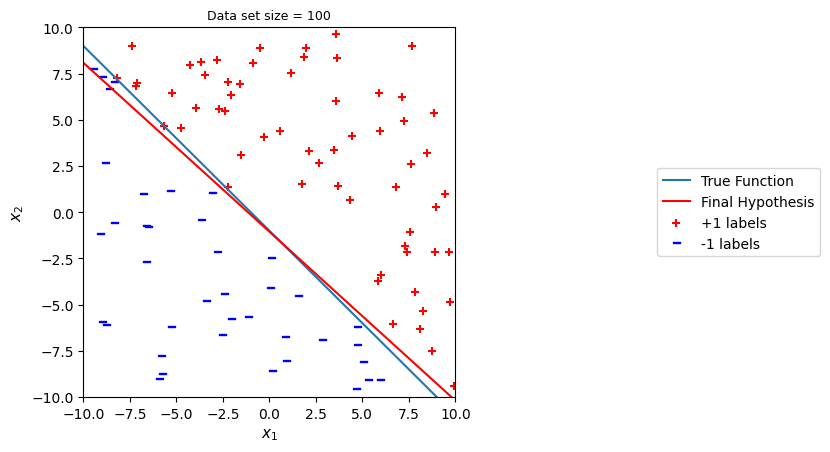

Eta =  0.01  Accuracy =  0.97
----------------------------------------------


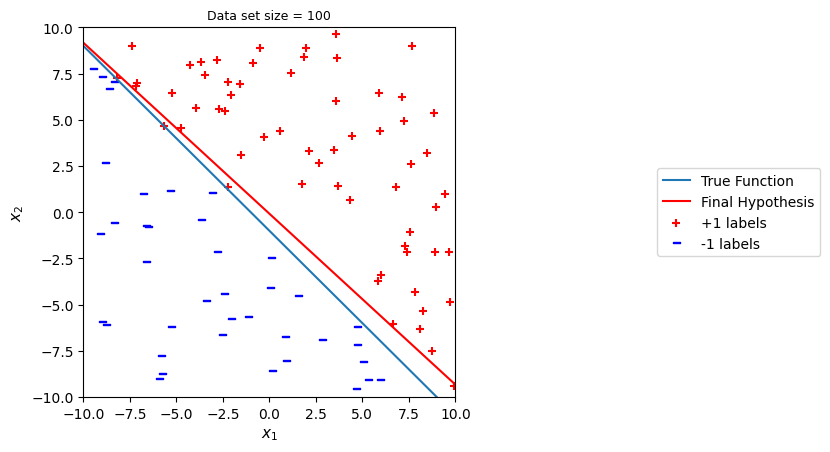

Eta =  0.0001  Accuracy =  0.96
----------------------------------------------


In [138]:
for eta in [100, 1, 0.01, 0.0001]:
    norm_g, num_its = perceptron(data, dim=2, max_it=1000, mod_perceptron=True, eta=eta, randomize=True)
    norm_coeffs = [f_w0, f_w1, f_w2]
    lb, ub = -10, 10  # Adjust the lower and upper bounds as needed
    plot_data(df, norm_coeffs, norm_g, lb, ub)

    xs = test_df[['x0', 'x1', 'x2']].values
    ys = test_df['y'].values
    accuracy = 0
    for x, y in zip(xs, ys):
        prod = np.dot(norm_g.T, x)*y
        if prod > 0:
            accuracy +=1
    print('Eta = ', eta, ' Accuracy = ', accuracy/100)
    print('----------------------------------------------')